In [11]:
import pandas as pd
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

train = pd.read_csv('/home/sanju/Desktop/kaggle/bike-sharing/input/train.csv')
test = pd.read_csv('/home/sanju/Desktop/kaggle/bike-sharing/input/test.csv')

In [73]:
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/home/sanju/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [10]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


(array([ 4284.,  2337.,  1686.,  1067.,   633.,   426.,   233.,   116.,
           85.,    19.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

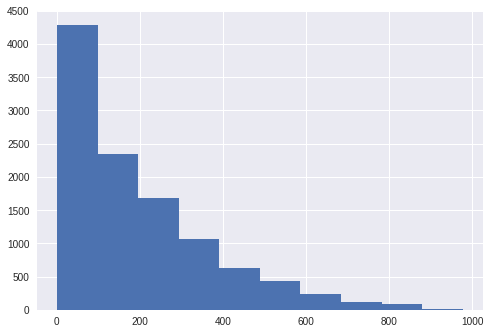

In [12]:
plt.hist(train['count'])

In [13]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [14]:
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['hour'] = train['datetime'].dt.hour

test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year
test['hour'] = test['datetime'].dt.hour

In [15]:
st.pearsonr(train['month'],train['season'])

(0.97152379963239277, 0.0)

In [16]:
casual = train.copy()
registered = train.copy()

In [17]:
train['month_order'] = train['month']
train['month_order'][train['year']==2012] = 12+train['month_order'][train['year']==2012]

test['month_order'] = test['month']
test['month_order'][test['year']==2012] = 12+test['month_order'][test['year']==2012]

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,month_order
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4,1


In [19]:
train.month_order.describe()

count    10886.000000
mean        12.544644
std          6.903813
min          1.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: month_order, dtype: float64

In [20]:
test_cas = test.copy()
test_reg = test.copy()

In [21]:
casual['month_order'] = train['month_order']
registered['month_order'] = train['month_order']

In [22]:
train.groupby('month_order')['count'].mean()

month_order
1      54.645012
2      73.641256
3      86.849776
4     111.026374
5     174.809211
6     196.877193
7     203.614035
8     182.666667
9     174.622517
10    174.773626
11    155.458333
12    134.173246
13    124.353201
14    145.646154
15    208.276923
16    257.455947
17    264.109649
18    287.186404
19    267.037281
20    285.570175
21    292.598684
22    280.508772
23    231.980220
24    217.054825
Name: count, dtype: float64

In [24]:
t = train.groupby('month_order')['month_order','count'].mean()
t.head()

,month_order,count
month_order,,
1,1.0,54.645012
2,2.0,73.641256
3,3.0,86.849776
4,4.0,111.026374
5,5.0,174.809211


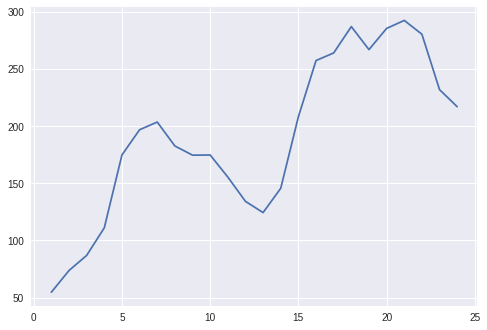

In [27]:
plt.plot(t['month_order'], t['count'])

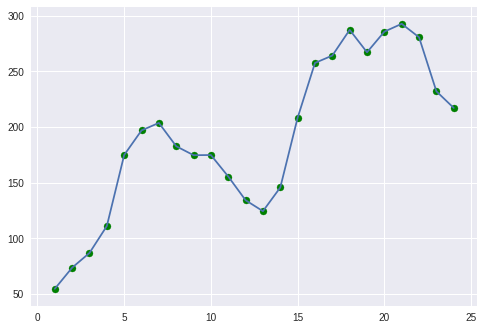

In [29]:
plt.plot(t['month_order'], t['count'])
plt.scatter(t['month_order'], t['count'], color = 'g')

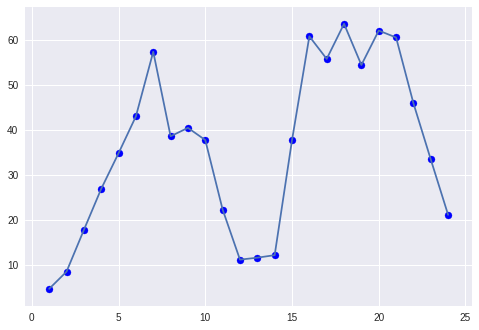

In [31]:
t = train.groupby('month_order')['month_order','casual'].mean()
plt.plot(t['month_order'], t['casual'])
plt.scatter(t['month_order'], t['casual'], color = 'b')

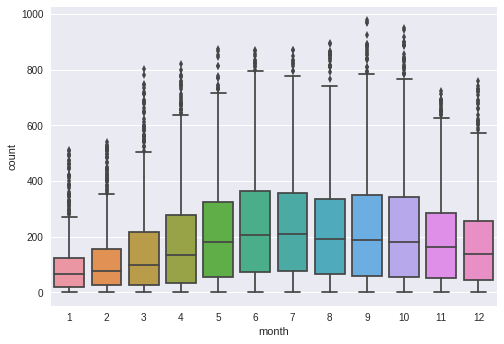

In [45]:
sns.boxplot(casual['month'],casual['count'])

In [32]:
casual['month_bin'] = casual['month_order']
casual['month_bin'][(casual['month_bin']>7) & (casual['month_bin']<11)] = 8
casual['month_bin'][(casual['month_bin']>11) & (casual['month_bin']<15)] = 12
casual['month_bin'][(casual['month_bin']>15) & (casual['month_bin']<22)] = 16
casual_cat = []
#casual_cat += ['month_bin']

test_cas['month_bin'] = test_cas['month_order']
test_cas['month_bin'][(test_cas['month_bin']>7) & (test_cas['month_bin']<11)] = 8
test_cas['month_bin'][(test_cas['month_bin']>11) & (test_cas['month_bin']<15)] = 12
test_cas['month_bin'][(test_cas['month_bin']>15) & (test_cas['month_bin']<22)] = 16
casual_cat = []
#casual_cat += ['month_bin']

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__ma

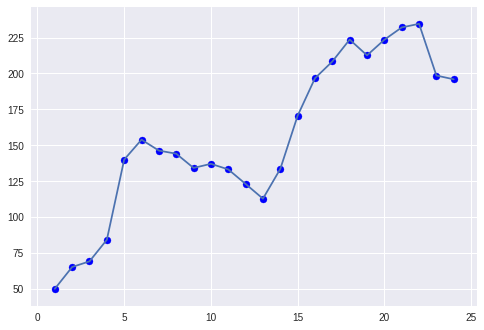

In [33]:
t = train.groupby('month_order')['month_order','registered'].mean() 
plt.plot(t['month_order'], t['registered'])
plt.scatter(t['month_order'], t['registered'], color = 'b')

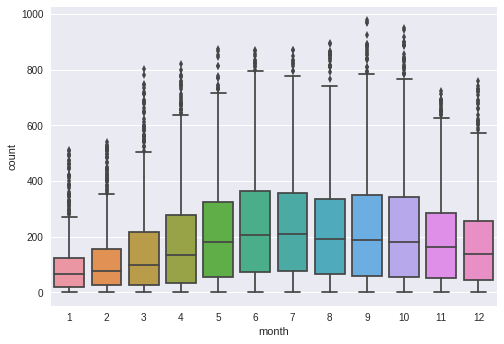

In [46]:
sns.boxplot(registered['month'],registered['count'])

In [34]:
registered['month_bin'] = 1
#registered['month_bin'][(registered['month_bin']>0) & (registered['month_bin']<5)] = 2
registered['month_bin'][(registered['month_bin']>4) & (registered['month_bin']<15)] = 2
registered['month_bin'][(registered['month_bin']>14)] = 3
registered_cat = []
#registered_cat += ['month_bin']

test_reg['month_bin'] = 1
#test_reg['month_bin'][(test_reg['month_bin']>0) & (test_reg['month_bin']<5)] = 2
test_reg['month_bin'][(test_reg['month_bin']>4) & (test_reg['month_bin']<15)] = 2
test_reg['month_bin'][(test_reg['month_bin']>14)] = 3
registered_cat = []
#registered_cat += ['month_bin']

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A v

In [37]:
print train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


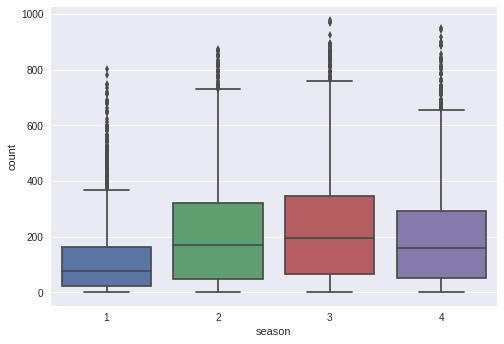

In [38]:
sns.boxplot(train['season'],train['count'])

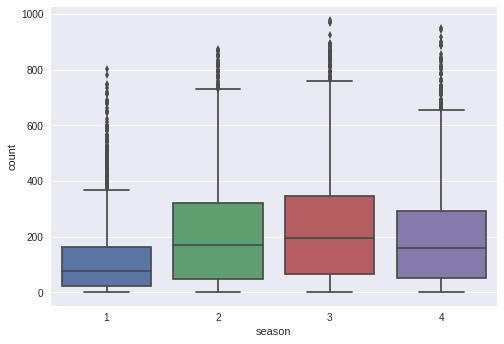

In [39]:
sns.boxplot(casual['season'],casual['count'])

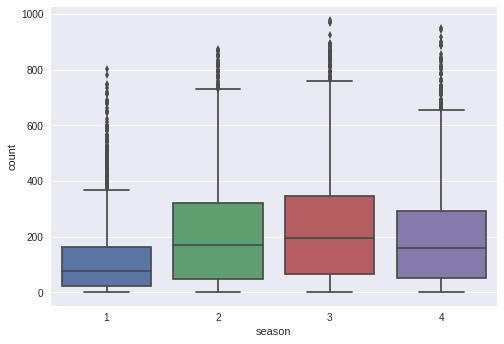

In [40]:
sns.boxplot(registered['season'],registered['count'])

In [41]:
casual_cat += ['season']
registered_cat += ['season']

In [43]:
train.groupby('season')['registered'].mean()

season
1    100.853686
2    167.804610
3    182.196853
4    170.407462
Name: registered, dtype: float64

In [44]:
#Based on above lets merge 2,3,4 since mean consumption is almost same.
registered['season'][registered['season']>1] = 2
test_reg['season'][test_reg['season']>1] = 2

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [47]:
print train[train['season'] == 1]['month'].unique()
print train[train['season'] == 2]['month'].unique()
print train[train['season'] == 3]['month'].unique()
print train[train['season'] == 4]['month'].unique()

#Season and month are almost equal
#To decide whether to use month or season

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


In [48]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

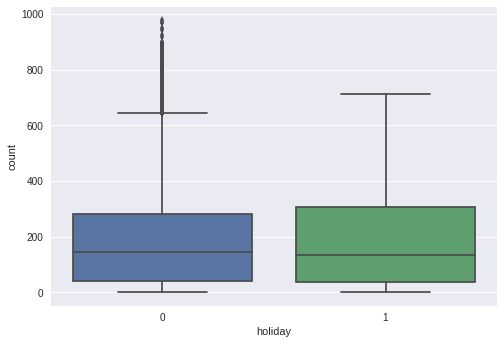

In [49]:
sns.boxplot(train['holiday'],train['count'])

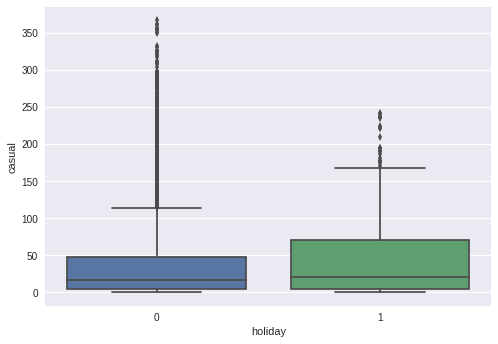

In [52]:
sns.boxplot(train['holiday'],train['casual'])

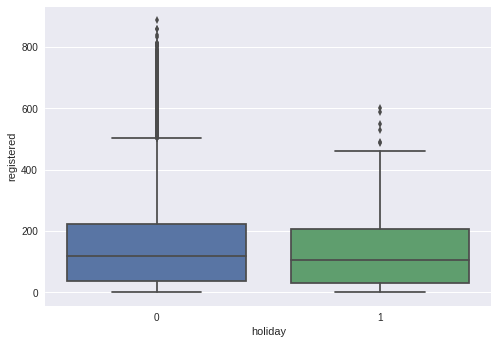

In [53]:
sns.boxplot(train['holiday'],train['registered'])

In [54]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,month_order
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4,1


In [55]:
train['weekend'] = 0
train['weekend'][(train['holiday']==0)&(train['workingday']==0)] = 1

test_reg['weekend'] = 0
test_reg['weekend'][(test_reg['holiday']==0)&(test_reg['workingday']==0)] = 1

test_cas['weekend'] = 0
test_cas['weekend'][(test_cas['holiday']==0)&(test_cas['workingday']==0)] = 1

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

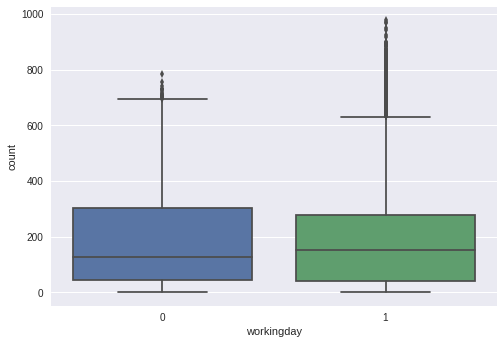

In [58]:
sns.boxplot(train['workingday'],train['count'])

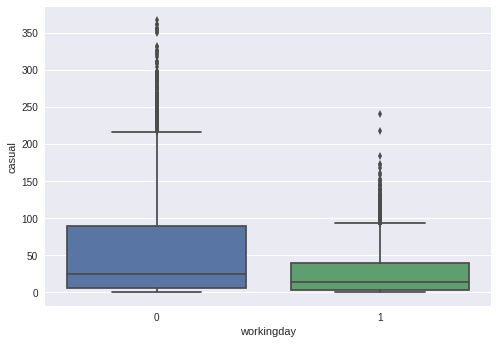

In [59]:
sns.boxplot(train.workingday,train.casual)

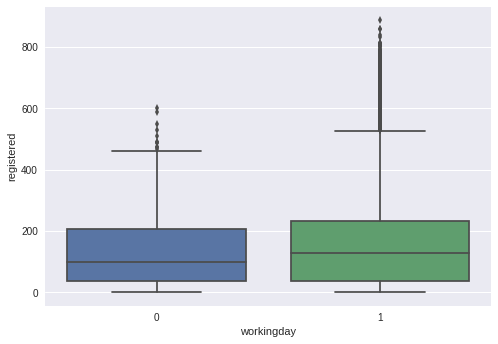

In [60]:
sns.boxplot(train.workingday,train.registered)

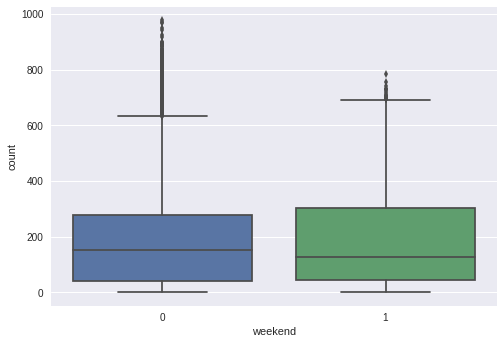

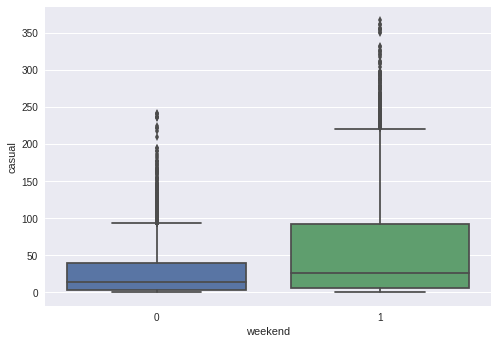

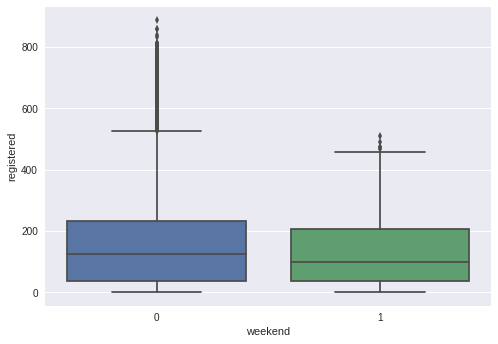

In [62]:
sns.boxplot(train['weekend'], train['count'])
plt.show()
sns.boxplot(train['weekend'], train['casual'])
plt.show()
sns.boxplot(train['weekend'], train['registered'])
plt.show()

In [63]:
casual['weekend'] = train['weekend']
registered['weekend'] = train['weekend']

casual_cont = []
registered_cont = []
casual_cont += ['holiday','workingday']
registered_cont += ['holiday','workingday']

In [65]:
print st.pearsonr(train['weekend'],train['holiday'])
print st.pearsonr(train['weekend'],train['workingday'])
print st.pearsonr(train['holiday'],train['workingday'])

(-0.10974799252924494, 1.586626829201081e-30)
(-0.93477992443929947, 0.0)
(-0.25049139118730052, 2.1465867615739963e-155)


In [66]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,hour,month_order,weekend
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.001729,0.971524,-0.004797,-0.006546,0.480533,-0.002433
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.015877,0.001731,0.012021,-0.000354,0.011312,-0.109748
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.009829,-0.003394,-0.002482,0.002780,-0.003851,-0.934780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.007890,0.012144,-0.012548,-0.022740,-0.004847,-0.032078
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.015551,0.257589,0.061226,0.145430,0.181726,-0.030873
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.011866,0.264173,0.058540,0.140343,0.182676,-0.023405
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.011335,0.204537,-0.078606,-0.278011,0.033727,0.010463
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.036157,-0.150192,-0.015221,0.146631,-0.088161,-0.016816
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.014109,0.092722,0.145241,0.302045,0.172492,0.311558
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.019111,0.169451,0.264265,0.380540,0.314218,-0.114959


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


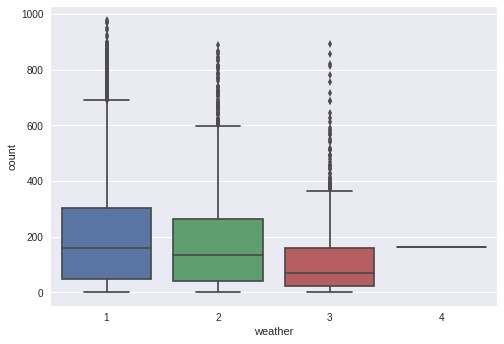

In [68]:
print train['weather'].value_counts()
sns.boxplot(train['weather'],train['count'])

In [69]:
train['weather'][train['weather'] == 4] = 1
test_cas['weather'][test_cas['weather'] == 4] = 1
test_reg['weather'][test_reg['weather'] == 4] = 1

casual['weather'][casual['weather'] == 4] = 1
casual['weather'][casual['weather'] == 4] = 1

registered['weather'][registered['weather'] == 4] = 1
registered['weather'][registered['weather'] == 4] = 1

casual_cat += ['weather']
registered_cat += ['weather']

/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sanju/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/sanju/anaconda2/lib/python2.7

In [70]:
test.weather.value_counts()

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

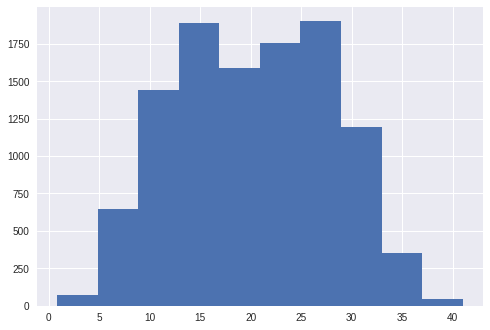

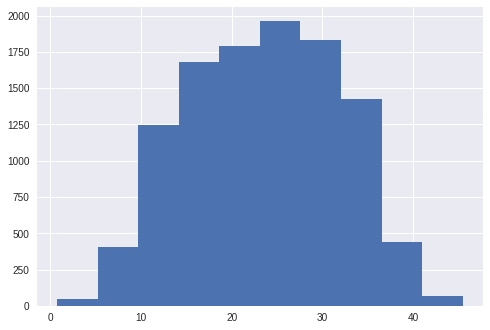

In [71]:
plt.hist(train['temp'])
plt.show()
plt.hist(train['atemp'])
plt.show()

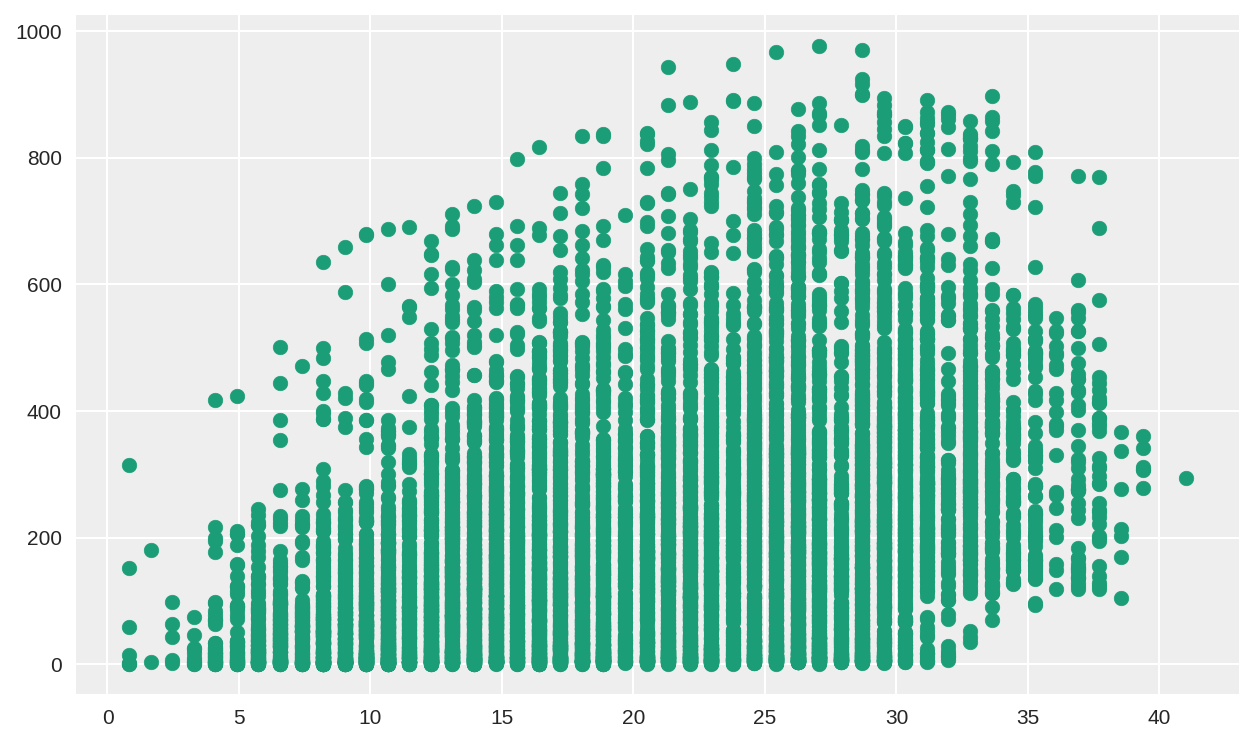

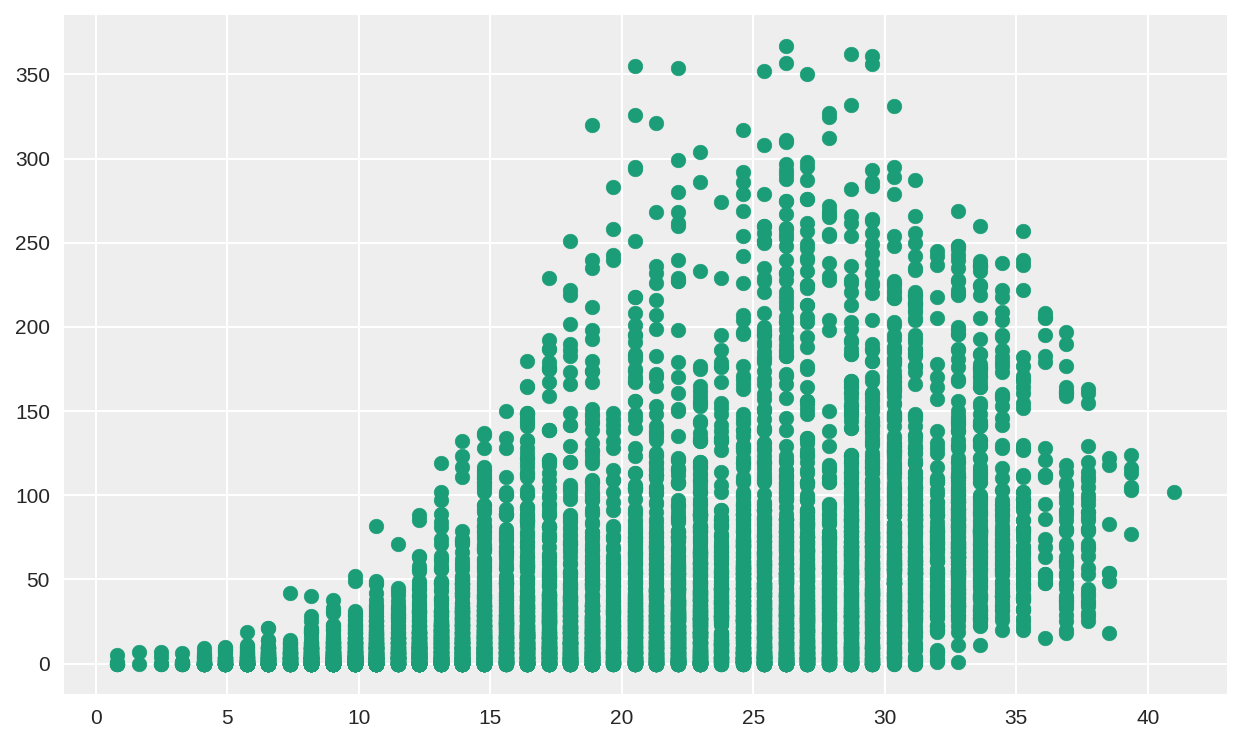

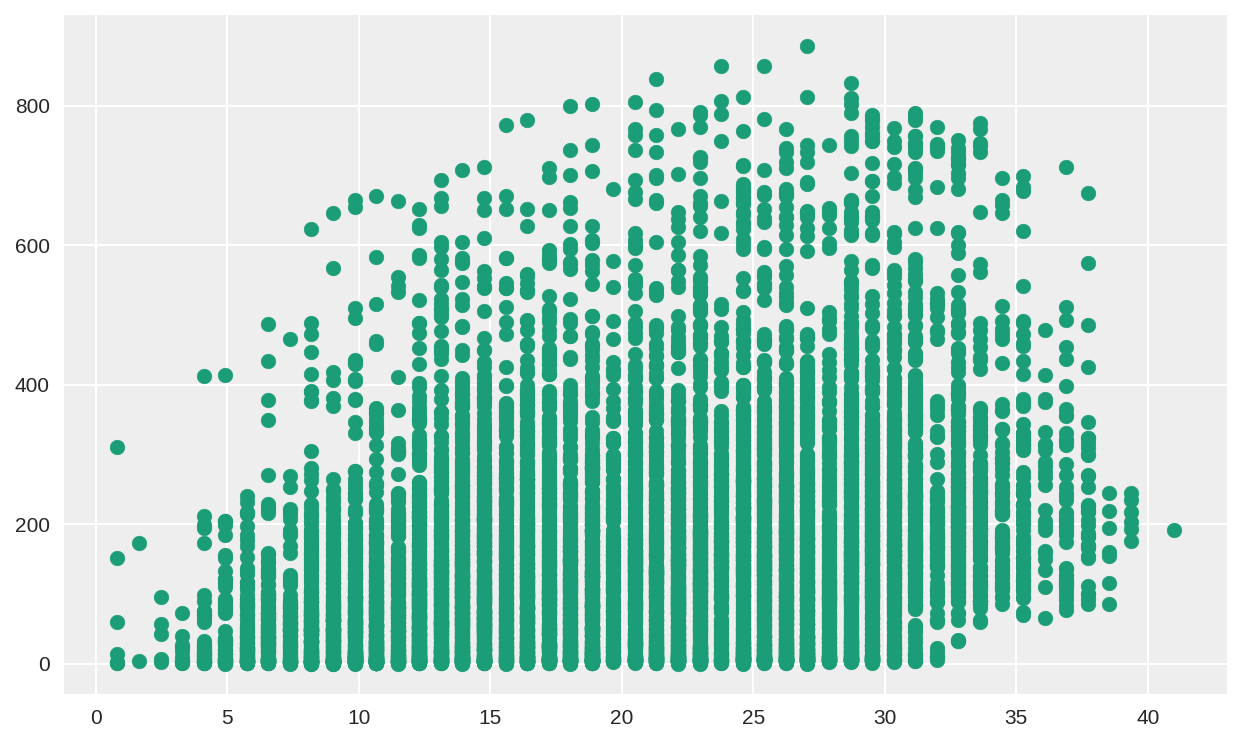

In [74]:
plt.scatter(train['temp'], train['count'])
plt.show()
plt.scatter(train['temp'], train['casual'])
plt.show()
plt.scatter(train['temp'], train['registered'])
plt.show()